You are given the MNIST dataset (https://github.com/jiaxinxie97/COMP4331/tree/master/ assign1/Q3). The first column is the class label. 
The other columns are the intensity values for each individual pixel in each MNIST image. Note that the feature dimensionality is 784. Also, this dataset has been split into a training set and a test set.
In this question, you have to implement in python:
    The 1-nearest neighbor classifier, using the Euclidean distance as distance measure. Note that you need to implement it from scratch, directly calling a function is not allowed.
    PCA,usingtheclasssklearn.decomposition.PCA(https://scikit-learn.org/stable/modules/generated/ sklearn.decomposition.PCA.html).
Then, perform the following steps:
1. Run your 1-nearest neighbor classifier, and report the test set accuracy.
2. (Use PCA to reduce the feature dimensionality) For each PCA dimension d in {1,50,100,200,300}, perform PCA to extract d features, and then go back to step 1.
    1. On the test data, you should use the same PCA transform as obtained on the training set, which can be retrieved from your pca object.components , your pca object in the object created by sklearn.decomposition.PCA.
3. What trend do you observe?

In [0]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.decomposition import PCA

In [0]:
# Create the test and training datasets
train = pd.read_csv('Q3/Q3_train.csv')
test = pd.read_csv('Q3/Q3_test.csv')
#drop the 
X_train = np.array(train.drop(columns=['0']))
y_train = np.array(train.iloc[:,0])
X_test = np.array(test.drop(columns=['0']))
y_test = np.array(test.iloc[:,0])
y_train[30]

5.0

In [0]:
#Find the nearest neighbor of a test example and return it's index
def getPred(X_train, s):
    distances = []
    for i in range(len(X_train)):
        distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(X_train[i][:], s)]))
        distances.append(distance)
#     print(len(distances))
    return y_train[np.argmin(distances)]

In [0]:
if y_test[0] == getPred(X_train, X_test[0][:]):
    print(True)
else:
    print(False)

False


In [0]:
#Check the accuracy with which the nearest neighbors for the variables are
def score(X_train, X_test):
    correct = 0
    ind = -1
    for i in range(len(X_test)):
        if y_test[i] == getPred(X_train, X_test[i][:]):
            correct += 1
    return (correct*1.0/len(X_test))

0.8324345355345435

In [0]:
#Perform PCA to reduce dimensionality
d = [1,50,100,200,300]
scores = []
for i in d:
    pca = PCA(n_components=i)
    X_train_new = pca.fit_transform(X_train)
    X_test_new = pca.transform(X_test)
    sc = score(X_train_new, X_test_new)
    scores.append(sc)
print(scores)
    

[0.20714285714285716, 0.8714285714285714, 0.8666666666666667, 0.8357142857142857, 0.830952380952381]


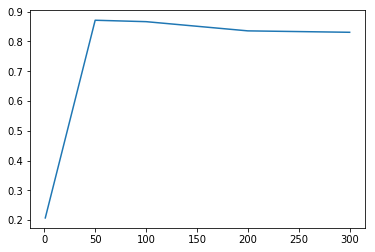

In [0]:
import matplotlib.pyplot as plt
plt.plot(d,scores)
plt.savefig('Q3/PCA_1NN.png')
plt.show()


We observe the trend that performing PCA first increases the accuracy score which then plateaus out at around 87% for 50 features. Removing additional feature set boosts learning rates and diminishes computation costs by removing redundant features